In this project, I analyze Walmart's weekly sales data across 45 different stores to gain insights into their sales performance and identify trends and patterns. I then use this data to forecast future sales, which can assist Walmart in making strategic decisions. This analysis will provide Walmart with valuable information on how to optimize their sales and allocate resources effectively. Additionally, by understanding how sales vary across different stores, Walmart can identify areas for improvement and potential opportunities for growth. Overall, this project will enable Walmart to gain a deeper understanding of their sales performance and make data-driven decisions to drive future success.

In [2]:
# for data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
# silence any future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Loading the dataset
walmart_df = pd.read_csv("Walmart.csv")

### Data Preproceesing and EDA

In [4]:
#getting technical summary
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#first five rows
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#summary statistics of the dataset
walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
#checking of missing values
walmart_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#checking for columns in the dataset
walmart_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
walmart_df.shape

(6435, 8)

In [30]:
#converting 'Date' to a datetime datatype, extracting various date-related features from the dates and creating column for them.
walmart_df["Date"] = pd.to_datetime(walmart_df['Date'])
walmart_df["Day"] = walmart_df["Date"].dt.weekday
walmart_df["Week"] = walmart_df["Date"].dt.week
walmart_df["Month"] = walmart_df["Date"].dt.month
walmart_df["Year"]= walmart_df["Date"].dt.year

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify in

In [10]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [11]:
#checking for number of unique values in columns
for i in walmart_df.columns:
    print(f'{i}: {walmart_df[i].nunique()}')

Store: 45
Date: 143
Weekly_Sales: 6435
Holiday_Flag: 2
Temperature: 3528
Fuel_Price: 892
CPI: 2145
Unemployment: 349
Day: 7
Week: 52
Month: 12
Year: 3


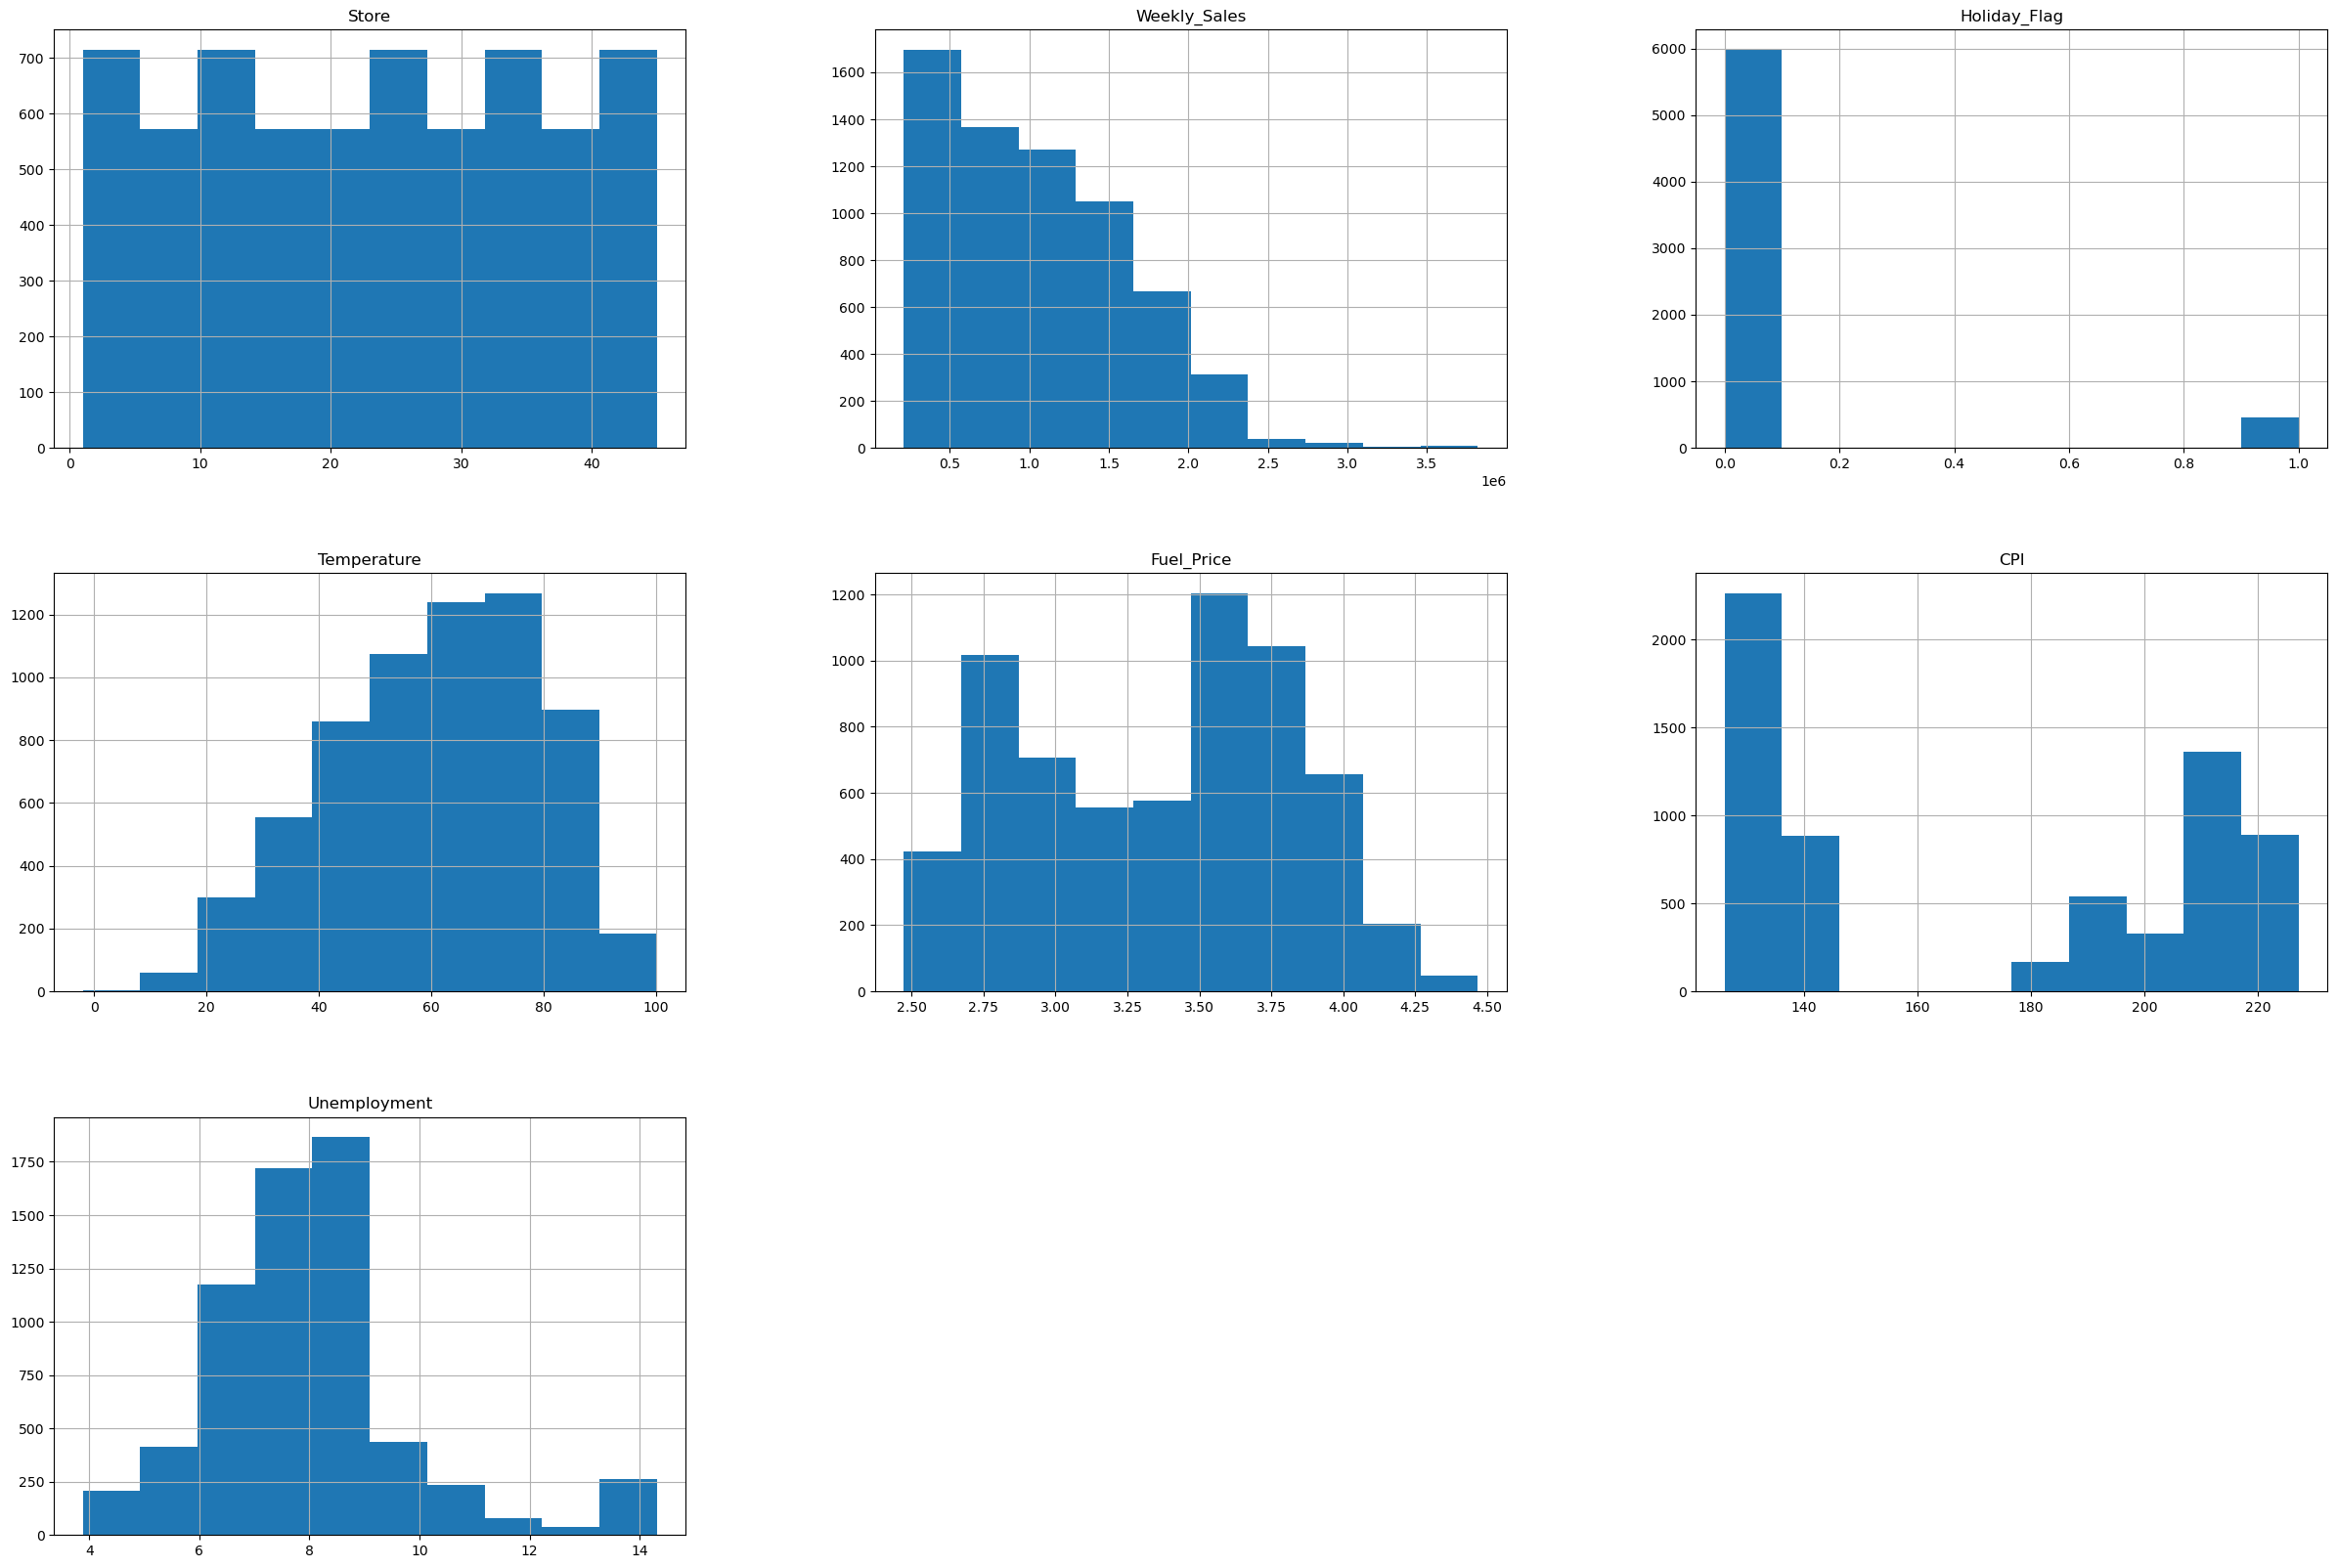

In [8]:
#Distributions of the features of the dataset
walmart_df.hist(figsize=(30,20))
plt.show()

The number of transactions occurred almost evenly across various stores and years.
The distribution of weekly_sales right-skewed. Only a few of the weekly sales are above 2 million USD.
The distribution of temperature is approximately normal.
The distribution of fuel_price is bi-modal.
CPI formed two clusters.
Unemployment rate is near normally distributed.
Four consecutive months November-February recorded the highest sales.

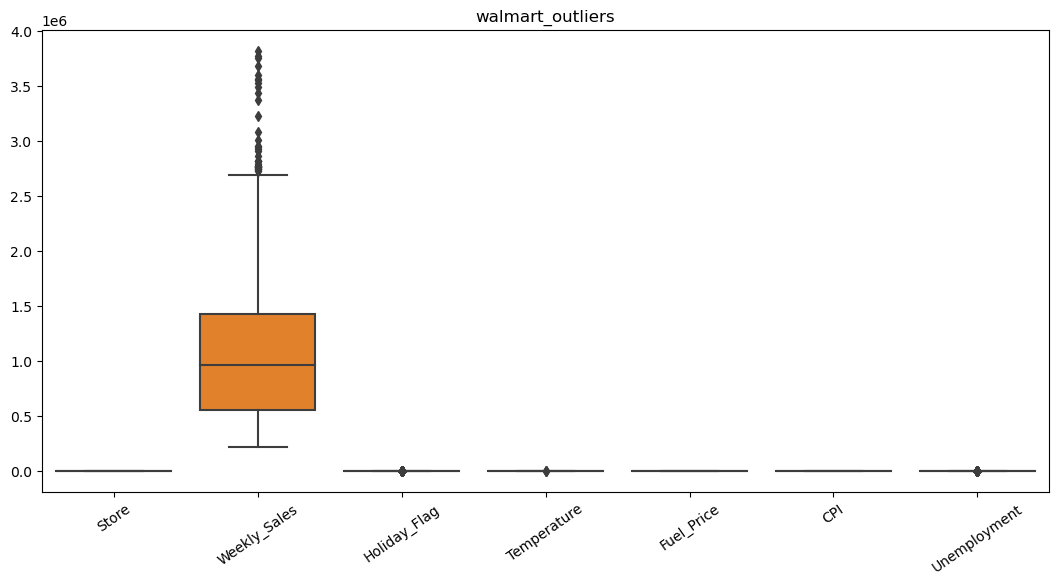

In [16]:
# Checking for Outliers
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = walmart_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("walmart_outliers")
plt.show()

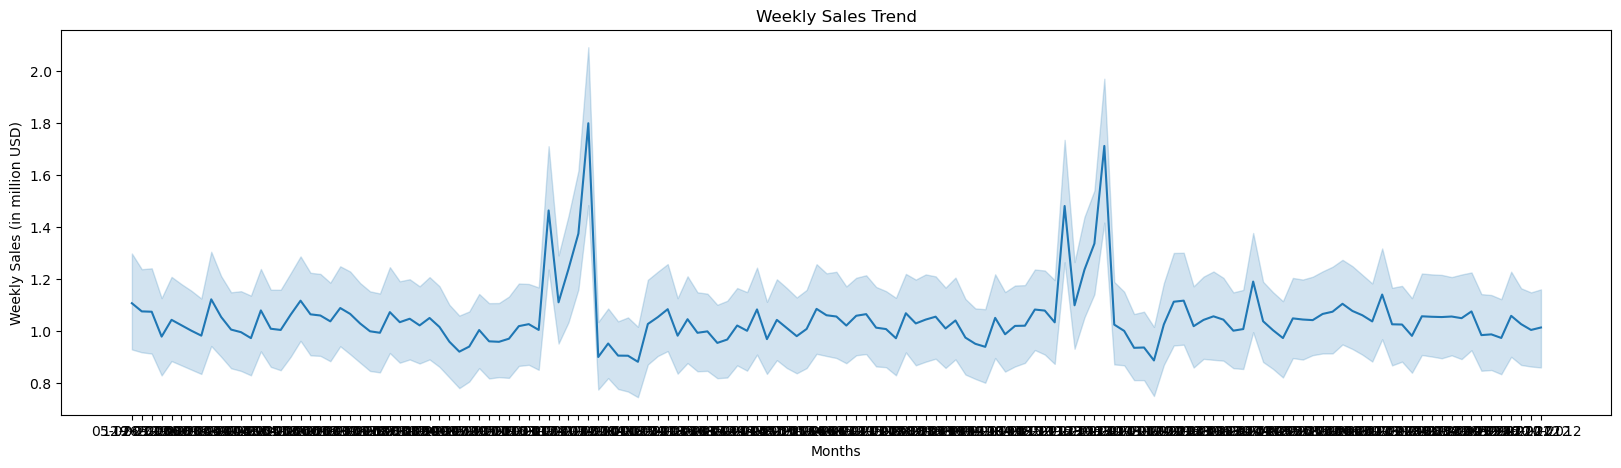

In [15]:
# Overall trend in sales overtime
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=walmart_df.Date, y=(walmart_df.Weekly_Sales/1e6))
plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')

plt.show()

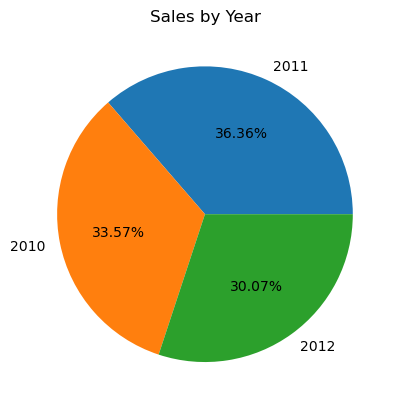

In [13]:
#creating a simple pie chart to visualize the annual sales data in the 'Year' 
plt.pie(walmart_df['Year'].value_counts().values,labels =walmart_df['Year'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Sales by Year')
plt.show()

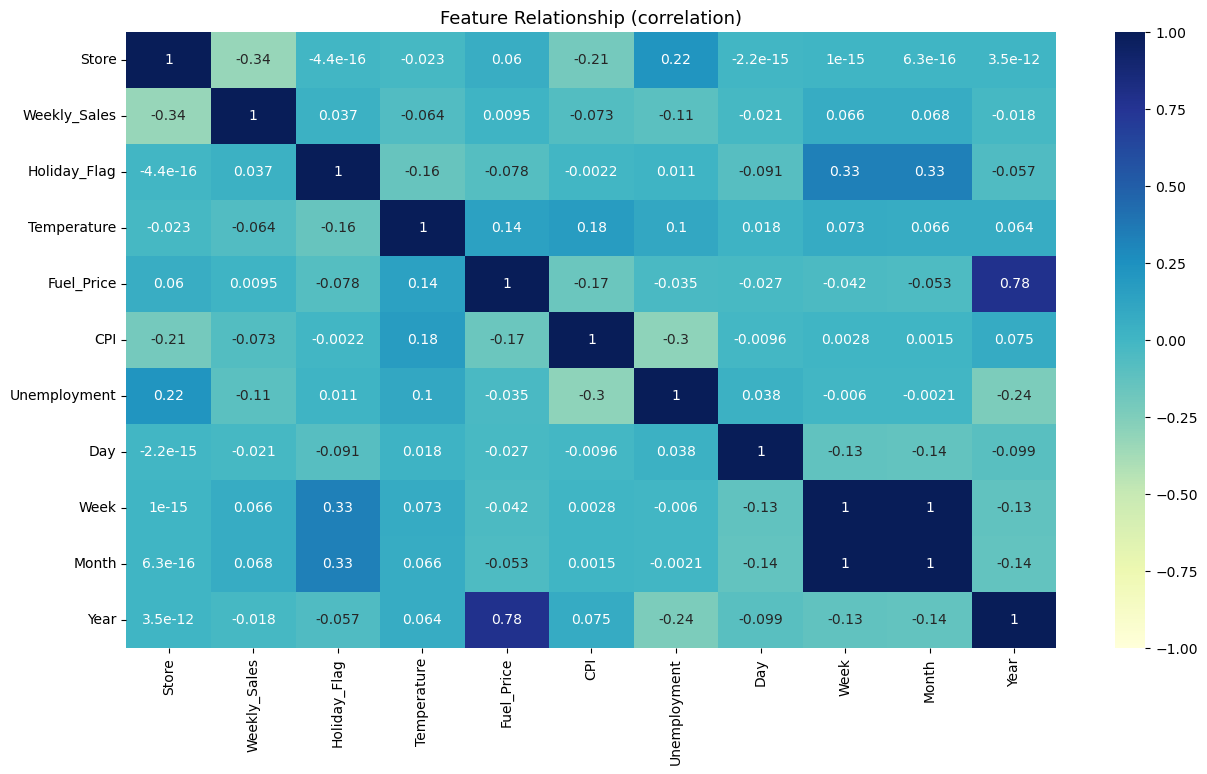

In [17]:
# let's see how the features are related
plt.figure(figsize=(15,8))
sns.heatmap(walmart_df.corr(),
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap ="YlGnBu"
            )
plt.title("Feature Relationship (correlation)", size=13)
plt.show()

<Figure size 1500x1200 with 0 Axes>

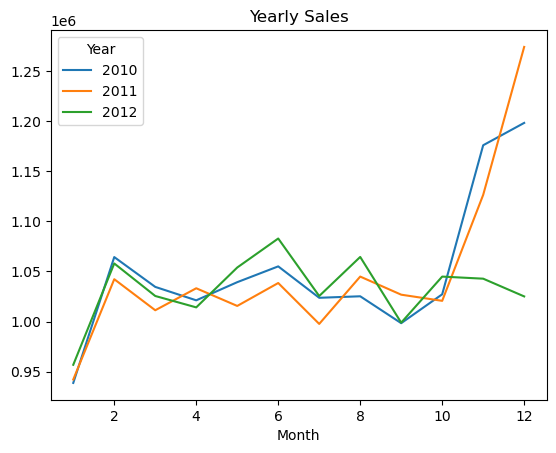

In [23]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(walmart_df, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [24]:
#comparing holiday sales to non_holidays sales
# filter out non-holiday and holiday weekly sales 
non_holiday_sales = walmart_df[walmart_df['Holiday_Flag'] == 0]
holiday_sales = walmart_df[walmart_df['Holiday_Flag'] == 1]

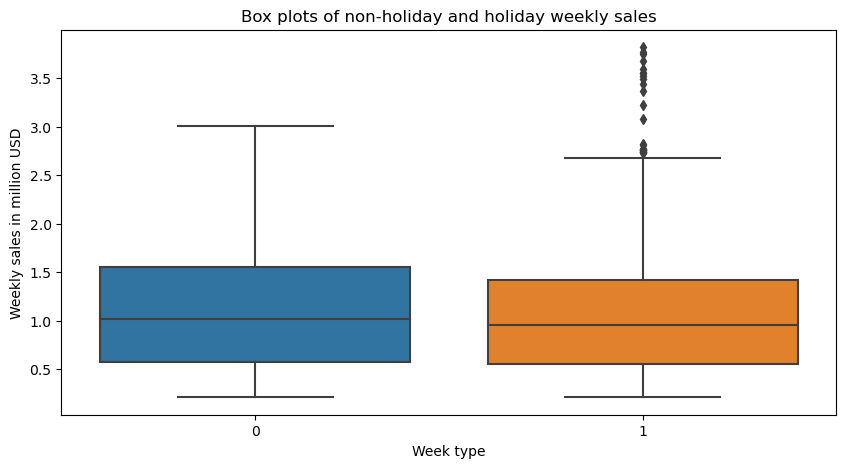

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6])
plt.ylabel('Weekly sales in million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

### Modelling

In [31]:
#Separating X and Y
X = walmart_df.drop(['Weekly_Sales','Day', 'Month', 'Week', 'Year', 'Unemployment', 'Date'], axis=1)



y = walmart_df['Weekly_Sales']

In [33]:
#scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [36]:
regressors = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(max_depth=5),
    KNeighborsRegressor(n_neighbors=5),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
]

In [37]:
# Defining the training and testing data
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
# Defining function to evaluate each regressor
def evaluate_regressor(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [39]:
# a list comprehension to evaluate each regressor and generate a list of RMSE scores
regressor_names = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', 'Decision Tree', 'KNN', 'Gradient Boosting']
regressor_rmses = [evaluate_regressor(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]

In [40]:
#Create a Pandas DataFrame to display the results
results_df = pd.DataFrame({'Regressor': regressor_names, 'RMSE': regressor_rmses})
print(results_df)

           Regressor           RMSE
0  Linear Regression  523162.760867
1              Lasso  523162.755961
2              Ridge  523162.502333
3        Elastic Net  523220.002761
4      Random Forest  146441.680646
5      Decision Tree  315348.721159
6                KNN  375064.558471
7  Gradient Boosting  186520.818612


In [45]:
rmses = []
for regressor in regressors:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmses.append(rmse)

In [46]:
#Finding the best regressor and its corresponding RMSE
best_regressor_index = np.argmin(rmses)
best_regressor = regressor_names[best_regressor_index]
best_rmse = rmses[best_regressor_index]

In [47]:
#Calculate the average percentage error of the best regressor model
median_sale = np.median(y_test)
percent_deviation = round((best_rmse*100/median_sale), 2)
print('The best regressor is {} with an RMSE of {:.2f} and an average percentage error of {:.2f}%'.format(best_regressor, best_rmse, percent_deviation))

The best regressor is Random Forest with an RMSE of 144609.84 and an average percentage error of 14.98%


Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. 
The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 1.45e+05. This is a good estimate as it is 85% close to the median sale of the data.